# New Year's Resolutions

In this Facebook live code along session, you're going to check out Google trends data of keywords 'diet', 'gym' and 'finance' to see how they vary over time. Could there be more searches for these terms in January when we're all trying to turn over a new leaf? You're not going to do much mathematics today but you'll source your data, visualize it and learn about trends and seasonality in time series data. The emphasis will be squarely on a visual exploration of the dataset in question.

So the question remains: could there be more searches for these terms in January when we're all trying to turn over a new leaf?
Let's find out by going [here](https://trends.google.com/trends/explore?date=all&q=diet,gym,finance) and checking out the data (inspired by [this fivethirtyeight piece](https://fivethirtyeight.com/features/how-fast-youll-abandon-your-new-years-resolutions/)).

You can also download the data as a .csv, save to file and import into your very own Python environment to perform your own analysis. You'll do this now. Let's get it!

## Import data

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

* Import data that you downloaded and check out first several rows:

In [3]:
df = pd.read_csv('data/multiTimeline.csv', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


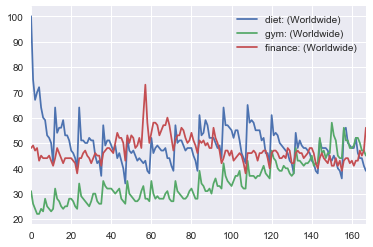

In [4]:
df.plot()

* Use the `.info()` method to check out your data types, number of rows and more:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


**Recap:**

* You've imported your data from google trends and had a brief look at it;

**Up next:**

* Wrangle your data and get it into the form you want to prepare it for analysis.

## Wrangle your data

* Rename the columns of `df` so that they have no spaces:

In [7]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


* Turn the 'month' column into a datetime data type and make it the index of the DataFrame;

In [12]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


Now it's time to explore your DataFrame visually.

## A bit of exploratory data analysis

* Use a built-in `pandas` visualization method to plot your data as 3 line plots on a single figure (one for each column):

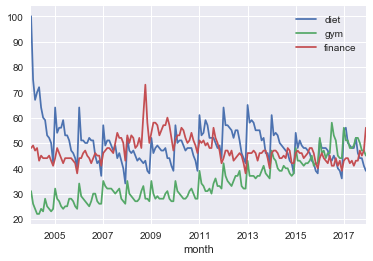

In [14]:
df.plot()

* Plot the 'diet' column by itself as a time series:

In [ ]:
____
____

**Note:** it looks like there are trends _and_ seasonal components to these time series.

**Recap:**

* You've imported your data from google trends and had a brief look at it;
* You've wrangled your data and gotten it into the form you want to prepare it for analysis.
* You've checked out youe time series visually.

**Up next:**

* Identify trends in your time series.

For more on pandas, check out our [Data Manipulation with Python track](https://www.datacamp.com/tracks/data-manipulation-with-python). For more on time series with pandas, check out our [Manipulating Time Series Data in Python course](https://www.datacamp.com/courses/manipulating-time-series-data-in-python).

If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/datacamp).

## Is there a trend?

There are several ways to think about identifying trends in time series. One popular way is by taking a _rolling average_, which means that, for each time point, you take the average of the points on either side of it (the number of points is specified by a _window size_, which you need to choose).

### Check out rolling average:

* Plot the rolling average of 'diet' using built-in `pandas` methods. What window size does it make sense to use?

In [ ]:
diet = ____
____

* Plot the rolling average of 'gym' using built-in `pandas` methods. What window size does it make sense to use?

In [ ]:
gym = ____
____

* Plot the trends of 'gym' and 'diet' on a single figure:

In [ ]:
df_rm = ____
____

## Seasonal patterns

You can remove the trend from a time series to investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over. Another way to remove the trend is called **differencing**, where you look at the diferrence between successive data points (called first-order differencing).

### First-order differencing

* Use `pandas` to compute and plot the first order difference of the 'diet' series:

In [ ]:
____
____

See that you have removed much of the trend and _you can really see the peaks in January every year_. Note: You can also perform 2nd order differencing if the trend is not yet entirely removed. See [here](https://www.otexts.org/fpp/8/1) for more on differencing.

Differencing is super helpful in turning you time series into a **stationary time series**. We won't get too much into these here but a **stationary time series** is one whose statistical properties (such as mean & variance) don't change over time. **Stationary time series** are useful because many time series forecasting methods are based on the assumption that the time series is approximately stationary.

**Recap:**

* You've imported your data from google trends and had a brief look at it;
* You've wrangled your data and gotten it into the form you want to prepare it for analysis.
* You've checked out youe time series visually.
* You've identified trends in your time series.
* You've had some experience with first-order differencing of times series.

**Up next:**

* Analyze your periodicity in your times series by looking at its autocorrelation function;
* But first: a short detour into correlation.

For more on pandas, check out our [Data Manipulation with Python track](https://www.datacamp.com/tracks/data-manipulation-with-python). For more on time series with pandas, check out our [Manipulating Time Series Data in Python course](https://www.datacamp.com/courses/manipulating-time-series-data-in-python).

If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/datacamp).

### Periodicity and Autocorrelation

A time series is _periodic_ if it repeats itself at equally spaced intervals, say, every 12 months. Another way to think of this is that if the time series has a peak somewhere, then it will have a peak 12 months after that and, if it has a trough somewhere, it will also have a trough 12 months after that. Yet another way of thinking about this is that the time series is _correlated_ with itself shifted by 12 months. 

Considering the correlation of a time series with such a shifted version of itself is captured by the concept of _autocorrelation_. We'll get to this in a minute. First, let's remind ourselves about correlation:

### Correlation

The correlation coefficient of two variables captures how linearly related they are:

* Import the iris dataset from scikit-learn, turn it into a DataFrame and view the head:

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_iris.head()

* Use `pandas` or `seaborn` to build a scatter plot of 'sepal length' against 'sepal width', coloured by the target (species):

In [ ]:
____

**Question:** Are sepal length and width positively or negatively correlated across all flowers? Are they positively or negatively correlated within each species? This is an essential distinction.

* Compute the correlation coefficients of each pair of measurements:

In [ ]:
____

Note that 'sepal length (cm)' and 'sepal width (cm)' seem to be negatively correlated! And they are, over the entire population of flowers measured. But they not within each species. For those interested, this is known as _Simpson's paradox_ and is essential when thinking about causal inference. You can read more [here](http://ftp.cs.ucla.edu/pub/stat_ser/r414.pdf). Let's check out correlation as a function of species:

* Compute the correlation coefficients of each pair of measurements within each species:

In [ ]:
____

**Recap:**

* You've imported your data from google trends and had a brief look at it;
* You've wrangled your data and gotten it into the form you want to prepare it for analysis.
* You've checked out youe time series visually.
* You've identified trends in your time series.
* You've had some experience with first-order differencing of times series.
* You've learnt about correlation of two variables, how to compute it and _Simpson's Paradox_.

**Up next:**

* Analyze your periodicity in your times series by looking at its autocorrelation function.

For more on pandas, check out our [Data Manipulation with Python track](https://www.datacamp.com/tracks/data-manipulation-with-python). For more on time series with pandas, check out our [Manipulating Time Series Data in Python course](https://www.datacamp.com/courses/manipulating-time-series-data-in-python).

If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/datacamp).

### Correlation of time series

* Plot all your time series again to remind yourself of what they look like:

In [ ]:
____
____

* Compute the correlation coefficients of all of these time series:

In [ ]:
____

* Interpret the above ^.

* Plot the first-order differences of these time series (removing the trend may reveal correlation in seasonality):

In [ ]:
____
____

* Compute the correlation coefficients of the first-order differences of these time series (removing the trend may reveal correlation in seasonality):

In [ ]:
____

## Autocorrelation

Now we've taken a dive into correlation of variables and correlation of time series, it's time to plot the autocorrelation of the 'diet' series: on the x-axis you have the lag and on the y-axis you have how correlated the time series is with itself at that lag. For example, if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.

* Plot the autocorrelation function of the time series diet:

In [ ]:
____

* Interpret the above.

**Recap:**

* You've imported your data from google trends and had a brief look at it;
* You've wrangled your data and gotten it into the form you want to prepare it for analysis.
* You've checked out youe time series visually.
* You've identified trends in your time series.
* You've had some experience with first-order differencing of times series.
* You've learnt about correlation of two variables, how to compute it and _Simpson's Paradox_.
* You've analyzed the periodicity in your times series by looking at its autocorrelation function.

In this Facebook live code along session, you've checked out Google trends data of keywords 'diet', 'gym' and looked cursorily at 'finance' to see how they vary over time. For those eager data scientists, there are two things you could do right away:

* Look into the 'finance' column and report what you find;
* Use ARIMA modeling to make some time series forecasts as to what these search trends will look like over the coming years. Jason Brownlee at Machine Learning Mastery has a cool tutorial on [ARIMA modeling in Python](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/), DataCamp has a [great ARIMA Modeling with R](https://www.datacamp.com/courses/arima-modeling-with-r) and we'll also have a Python Time Series forecasting course up and running this year.